# Make Calibration WAV Files
## By Terry Bondy, VA3TYB

In [ ]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))

In [ ]:
load "VA3TYB_A_s.mat"

In [ ]:
rows(VA3TYB_A_s)

In [18]:
# Freq = 400:4:400+4*(rows(VA3TYB_A_s)-1);
fcLow = 200;
fcHigh = 2600;
period = 10;
Freq = 200/2:1/period:2600*2;
T = 0:1/16000:period;

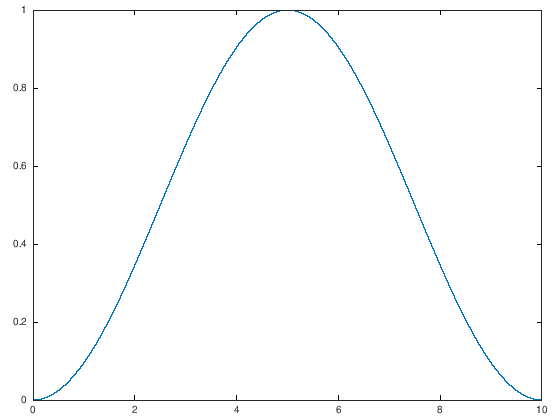

In [22]:
plot(T, (1 - cos(2*pi*T/period))/2);

In [23]:
rc = @(t) (1 - cos(2*pi*t/period))/2;
cosArg = 2*pi*Freq';
tic = time();
Sig = arrayfun(@(t) rc(t) * sum(cos(cosArg*t)), T);
printf("toc: %d seconds", time() - tic)

toc: 202.504 seconds

In [24]:
audioformats()


name: AIFF (Apple/SGI)
extension: aiff
id: 131072
subformats:
  Signed 8 bit PCM
  Signed 16 bit PCM
  Signed 24 bit PCM
  Signed 32 bit PCM
  Unsigned 8 bit PCM
  32 bit float
  64 bit float
  U-Law
  A-Law
  IMA ADPCM
  GSM 6.10
  12 bit DWVW
  16 bit DWVW
  24 bit DWVW
name: AU (Sun/NeXT)
extension: au
id: 196608
subformats:
  Signed 8 bit PCM
  Signed 16 bit PCM
  Signed 24 bit PCM
  Signed 32 bit PCM
  32 bit float
  64 bit float
  U-Law
  A-Law
  32kbs G721 ADPCM
  24kbs G723 ADPCM
name: AVR (Audio Visual Research)
extension: avr
id: 1179648
subformats:
  Signed 8 bit PCM
  Signed 16 bit PCM
  Unsigned 8 bit PCM
name: CAF (Apple Core Audio File)
extension: caf
id: 1572864
subformats:
  Signed 8 bit PCM
  Signed 16 bit PCM
  Signed 24 bit PCM
  Signed 32 bit PCM
  32 bit float
  64 bit float
  U-Law
  A-Law
  16 bit ALAC
  20 bit ALAC
  24 bit ALAC
  32 bit ALAC
name: FLAC (Free Lossless Audio Codec)
extension: flac
id: 1507328
subformats:
  Signed 8 bit PCM
  Signed 16 bit PCM
  

In [16]:
cosArg = 2*pi*Freq';
tic = time();
Sig = arrayfun(@(t) sum(cos(cosArg*t)), T);
printf("toc: %d", time() - tic)

toc: 79.792

In [ ]:
arg = 2*pi*Freq'*T;

In [ ]:
arg = cos(arg);

In [ ]:
arg = sum(arg);
# # Sig = sum(A_s .* cos(2*pi*Freq'*T));
# # sq3 = sqrt(3);
# # Sig = sum(A_s .* cos(2*pi*Freq'*T + pi/2 - atan(Freq' .* sq3/2600) - atan(Freq' .* 1/(sq3 * 200))));

ans =  1


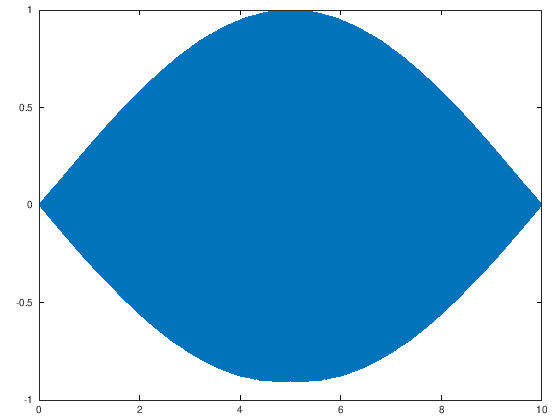

In [25]:
max(abs(Sig))
# A_s' * A_s
plot(T, Sig)

In [ ]:
Freq = 1:1:1000000;
sq3 = sqrt(3);
semilogx(Freq, pi/2 - atan(Freq .* sq3/2600) - atan(Freq .* 1/(sq3 * 200)));

In [26]:
wavwrite(Sig, 16000, "calibrate.wav")

    wavwrite at line 51 column 5


In [ ]:
audiowrite("")